In [1]:
import numpy

from pyscf import qmmm
from pyscf import gto, scf

def get_r_ene(r):
    dr_list = numpy.linspace(-0.05, 0.05, 21)

    atm_list   = []
    e_r_list   = []
    e_u0_list  = []
    e_u1_list  = []

    dm0_rhf  = None
    dm0_u0hf = None
    dm0_u1hf = None

    for dr in dr_list:
        rz  = r + dr
        rxy = r - dr
        atoms = f'''
          Ni    0.0000000     0.0000000     0.0000000
          H     0.0000000     0.0000000    {rz: 10.7f}
          H     0.0000000    {rxy: 10.7f}     0.0000000
          H    {rxy: 10.7f}     0.0000000     0.0000000
          H     0.0000000     0.0000000    {-rz: 10.7f}
          H     0.0000000    {-rxy: 10.7f}     0.0000000
          H    {-rxy: 10.7f}     0.0000000     0.0000000
        '''
        atm_list.append(atoms)

        mol = gto.Mole()
        mol.verbose = 0
        mol.output = f"./{dr}-0.log"
        mol.atom = atoms
        mol.basis = {"H": "sto3g", 'Ni': "lanl2dz"}
        mol.ecp   = {'Ni': "lanl2dz"}
        mol.symmetry = 0
        mol.charge   = -4
        mol.build()

        mf = scf.RHF(mol)
        mf.max_cycle  = 1000
        mf.diis_space = 10
        mf.verbose    = 4
        mf.kernel(dm0 = dm0_rhf)
        dm0_rhf = mf.make_rdm1()    
        e_r_list.append(mf.e_tot)

        assert mf.converged

        mf = scf.UHF(mol)
        mf.max_cycle  = 1000
        mf.diis_space = 10
        mf.verbose    = 4
        mf.kernel(dm0 = dm0_u0hf)
        dm0_u0hf = mf.make_rdm1()    
        e_u0_list.append(mf.e_tot)

        assert mf.converged

        mol = gto.Mole()
        mol.verbose = 0
        mol.output = f"./{dr}-1.log"
        mol.atom = atoms
        mol.basis = {"H": "sto3g", 'Ni': "lanl2dz"}
        mol.ecp   = {'Ni': "lanl2dz"}
        mol.symmetry = 0
        mol.charge   = -4
        mol.spin = 2
        mol.build()

        mf = scf.UHF(mol)
        mf.max_cycle  = 1000
        mf.diis_space = 10
        mf.verbose    = 4
        mf.kernel(dm0 = dm0_u1hf)
        dm0_u1hf = mf.make_rdm1()    
        e_u1_list.append(mf.e_tot)

        assert mf.converged
        
        print(f"dr = {dr: 4.2f}, erhf = {e_r_list[-1]: 8.6f}, eu0hf = {e_u0_list[-1]: 8.6f}, eu1hf = {e_u1_list[-1]: 8.6f}")
    
    e_r_list  = numpy.asarray(e_r_list)
    e_u0_list = numpy.asarray(e_u0_list)
    e_u1_list = numpy.asarray(e_u1_list)
    
    return dr_list, e_r_list, e_u0_list, e_u1_list

In [2]:
dr_list, e_r_list, e_u0_list, e_u1_list = get_r_ene(1.6)

WARN: HOMO -0.698067703593696 == LUMO -0.698067703593696
WARN: alpha nocc = 14  HOMO -0.691619804755468 >= LUMO -0.691619804755466
WARN: beta  nocc = 14  HOMO -0.691453298550295 >= LUMO -0.691453298550292
WARN: system HOMO -0.691453298550295 >= system LUMO -0.691453298550292
WARN: alpha nocc = 15  HOMO 0.616063110658747 >= LUMO 0.616063110658749
WARN: system HOMO 0.616063110658747 >= system LUMO 0.415147761702807
WARN: system HOMO 0.774467545409146 >= system LUMO 0.767178421406653


dr = -0.05, erhf = -170.364050, eu0hf = -170.377674, eu1hf = -170.103999
dr = -0.05, erhf = -170.365195, eu0hf = -170.378842, eu1hf = -170.103337
dr = -0.04, erhf = -170.366286, eu0hf = -170.379955, eu1hf = -170.102634
dr = -0.04, erhf = -170.367324, eu0hf = -170.381015, eu1hf = -170.101889
dr = -0.03, erhf = -170.368308, eu0hf = -170.382021, eu1hf = -170.101103
dr = -0.03, erhf = -170.369237, eu0hf = -170.382973, eu1hf = -170.100274
dr = -0.02, erhf = -170.370112, eu0hf = -170.383871, eu1hf = -170.099403
dr = -0.01, erhf = -170.370933, eu0hf = -170.384713, eu1hf = -170.098489
dr = -0.01, erhf = -170.371698, eu0hf = -170.385501, eu1hf = -170.097531
dr = -0.01, erhf = -170.372408, eu0hf = -170.386234, eu1hf = -170.096529
dr =  0.00, erhf = -170.373063, eu0hf = -170.386911, eu1hf = -170.095482
dr =  0.00, erhf = -170.373661, eu0hf = -170.387532, eu1hf = -170.094390
dr =  0.01, erhf = -170.374203, eu0hf = -170.388096, eu1hf = -170.093252
dr =  0.01, erhf = -170.374688, eu0hf = -170.388604

(-0.05, 0.05)

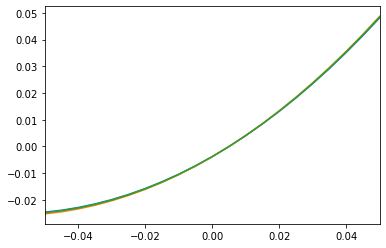

In [10]:
from matplotlib import pyplot

fig, ax = pyplot.subplots()
ax.plot(dr_list, e_r_list - e_r_list[11])
ax.plot(dr_list, e_u0_list - e_u0_list[11])
ax.plot(dr_list, e_u1_list - e_u1_list[11])

ax.set_xlim(-0.05, 0.05)
# ax.set_ylim(-0.01, 0.01)

In [6]:
from matplotlib import pyplot

dr_list, e_r_list, e_u0_list, e_u1_list = get_r_ene(1.2)

WARN: HOMO 0.415551319860804 == LUMO 0.415551319860819
WARN: alpha nocc = 15  HOMO 0.508440782578093 >= LUMO 0.508440782578096
WARN: system HOMO 0.508440782578093 >= system LUMO 0.264734028697636
WARN: system HOMO -0.821632591967901 >= system LUMO -0.846459346661492
WARN: system HOMO 1.14203841572903 >= system LUMO 0.924367521027418
WARN: system HOMO 1.12308323181685 >= system LUMO 0.940762654517545
WARN: system HOMO 1.21050699098348 >= system LUMO 0.961299638215289
WARN: system HOMO 1.20506257031395 >= system LUMO 0.946917986787633
WARN: system HOMO 1.14947894293386 >= system LUMO 0.926761311336632
WARN: system HOMO 0.77457476407515 >= system LUMO 0.759965238425962
WARN: alpha nocc = 15  HOMO 0.437551160856588 >= LUMO 0.438190931323957
WARN: system HOMO 0.429670087876047 >= system LUMO 0.429165582145161


dr = -0.05, erhf = -170.137161, eu0hf = -170.137760, eu1hf = -170.162670
dr = -0.05, erhf = -170.136430, eu0hf = -170.136976, eu1hf = -170.161923
dr = -0.04, erhf = -170.135401, eu0hf = -170.135891, eu1hf = -170.160878
dr = -0.04, erhf = -170.134074, eu0hf = -170.134507, eu1hf = -170.159534
dr = -0.03, erhf = -170.132447, eu0hf = -170.132821, eu1hf = -170.157891
dr = -0.03, erhf = -170.130519, eu0hf = -170.130833, eu1hf = -170.155946
dr = -0.02, erhf = -170.128290, eu0hf = -170.128543, eu1hf = -170.153699
dr = -0.01, erhf = -170.125758, eu0hf = -170.125948, eu1hf = -170.151147
dr = -0.01, erhf = -170.122921, eu0hf = -170.123048, eu1hf = -170.148289
dr = -0.01, erhf = -170.119777, eu0hf = -170.119841, eu1hf = -170.145122
dr =  0.00, erhf = -170.116325, eu0hf = -170.116325, eu1hf = -170.141644
dr =  0.00, erhf = -170.112563, eu0hf = -170.112499, eu1hf = -170.137850
dr =  0.01, erhf = -170.108489, eu0hf = -170.108361, eu1hf = -170.133739
dr =  0.01, erhf = -170.104100, eu0hf = -170.103908

(-0.05, 0.05)

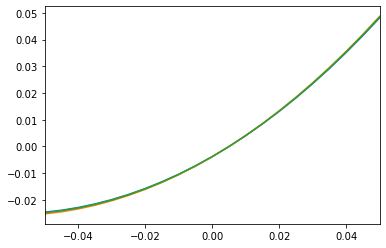

In [12]:
fig, ax = pyplot.subplots()
ax.plot(dr_list, e_r_list - e_r_list[11])
ax.plot(dr_list, e_u0_list - e_u0_list[11])
ax.plot(dr_list, e_u1_list - e_u1_list[11])
ax.set_xlim(-0.05, 0.05)

In [14]:
dr_list, e_r_list, e_u0_list, e_u1_list = get_r_ene(1.8)

WARN: HOMO -0.617866419390037 == LUMO -0.617866419390033
WARN: alpha nocc = 14  HOMO -0.612826047434306 >= LUMO -0.612826047434306
WARN: beta  nocc = 14  HOMO -0.612799692830044 >= LUMO -0.612799692830041
WARN: system HOMO -0.612799692830044 >= system LUMO -0.612799692830041
WARN: alpha nocc = 15  HOMO 0.619355413674171 >= LUMO 0.619355413674176
WARN: system HOMO 0.619355413674171 >= system LUMO 0.491876374301179
WARN: alpha nocc = 15  HOMO 0.578232491370213 >= LUMO 0.578535382625459


dr = -0.05, erhf = -170.056040, eu0hf = -170.393615, eu1hf = -170.347924
dr = -0.05, erhf = -170.054262, eu0hf = -170.393858, eu1hf = -170.347818
dr = -0.04, erhf = -170.052451, eu0hf = -170.394079, eu1hf = -170.347699
dr = -0.04, erhf = -170.050608, eu0hf = -170.394279, eu1hf = -170.347570
dr = -0.03, erhf = -170.048732, eu0hf = -170.394458, eu1hf = -170.347437
dr = -0.03, erhf = -170.046822, eu0hf = -170.394615, eu1hf = -170.347310
dr = -0.02, erhf = -170.044879, eu0hf = -170.394752, eu1hf = -170.347202
dr = -0.01, erhf = -170.042902, eu0hf = -170.394867, eu1hf = -170.347131
dr = -0.01, erhf = -170.040891, eu0hf = -170.394962, eu1hf = -170.347118
dr = -0.01, erhf = -170.038845, eu0hf = -170.395035, eu1hf = -170.347176
dr =  0.00, erhf = -170.036764, eu0hf = -170.395087, eu1hf = -170.347298
dr =  0.00, erhf = -170.034648, eu0hf = -170.395117, eu1hf = -170.347467
dr =  0.01, erhf = -170.032496, eu0hf = -170.395126, eu1hf = -170.347665
dr =  0.01, erhf = -170.030308, eu0hf = -170.395114

(-0.05, 0.05)

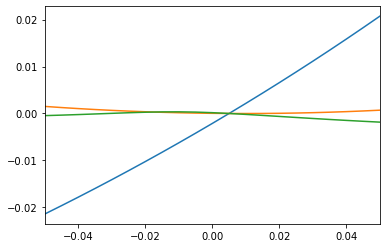

In [17]:
fig, ax = pyplot.subplots()
ax.plot(dr_list, e_r_list - e_r_list[11])
ax.plot(dr_list, e_u0_list - e_u0_list[11])
ax.plot(dr_list, e_u1_list - e_u1_list[11])
ax.set_xlim(-0.05, 0.05)

WARN: HOMO 0.478693059573294 == LUMO 0.478693059573335
WARN: alpha nocc = 14  HOMO 0.501144505719312 >= LUMO 0.501144505719317
WARN: beta  nocc = 14  HOMO 0.500945538104064 >= LUMO 0.500945538104066
WARN: system HOMO 0.500945538104064 >= system LUMO 0.500945538104066
WARN: system HOMO 0.267147405231313 >= system LUMO 0.316970475986672
WARN: alpha nocc = 15  HOMO 0.46705558130239 >= LUMO 0.467055581302391
WARN: system HOMO 0.46705558130239 >= system LUMO 0.241216350054557
WARN: system HOMO 1.09772113072385 >= system LUMO 0.898440999861038
WARN: system HOMO 1.22230458418026 >= system LUMO 0.9019449665868
WARN: system HOMO 1.16627035981366 >= system LUMO 0.90022404361411
WARN: system HOMO 1.33585670219099 >= system LUMO 0.958467467635345
WARN: system HOMO 1.31020520923893 >= system LUMO 0.948461174973063
WARN: system HOMO 1.30417798542661 >= system LUMO 0.945742672802057
WARN: system HOMO 1.28311041723989 >= system LUMO 0.937314243411526
WARN: system HOMO 1.28432493791431 >= system LUMO 0

dr = -0.05, erhf = -169.865889, eu0hf = -169.883259, eu1hf = -169.890582
dr = -0.05, erhf = -169.864070, eu0hf = -169.881462, eu1hf = -169.888809
dr = -0.04, erhf = -169.861794, eu0hf = -169.879208, eu1hf = -169.886575
dr = -0.04, erhf = -169.859058, eu0hf = -169.876496, eu1hf = -169.883881
dr = -0.03, erhf = -169.855861, eu0hf = -169.873323, eu1hf = -169.880728
dr = -0.03, erhf = -169.852202, eu0hf = -169.869688, eu1hf = -169.877109
dr = -0.02, erhf = -169.848078, eu0hf = -169.865591, eu1hf = -169.873026
dr = -0.01, erhf = -169.843488, eu0hf = -169.861027, eu1hf = -169.868476
dr = -0.01, erhf = -169.838430, eu0hf = -169.855996, eu1hf = -169.863457
dr = -0.01, erhf = -169.832900, eu0hf = -169.850495, eu1hf = -169.857965
dr =  0.00, erhf = -169.826896, eu0hf = -169.844521, eu1hf = -169.852000
dr =  0.00, erhf = -169.820415, eu0hf = -169.838072, eu1hf = -169.845555
dr =  0.01, erhf = -169.813455, eu0hf = -169.831144, eu1hf = -169.838631
dr =  0.01, erhf = -169.806012, eu0hf = -169.823735

(-0.05, 0.05)

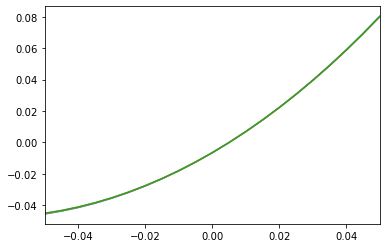

In [18]:
dr_list, e_r_list, e_u0_list, e_u1_list = get_r_ene(1.1)
fig, ax = pyplot.subplots()
ax.plot(dr_list, e_r_list - e_r_list[11])
ax.plot(dr_list, e_u0_list - e_u0_list[11])
ax.plot(dr_list, e_u1_list - e_u1_list[11])
ax.set_xlim(-0.05, 0.05)

WARN: HOMO -0.840638919367343 == LUMO -0.840638919367342
WARN: HOMO 0.533973798160144 == LUMO 0.533983786876746
WARN: alpha nocc = 14  HOMO -0.829920356386764 >= LUMO -0.829920356386763
WARN: beta  nocc = 14  HOMO -0.828688386232838 >= LUMO -0.828688386232838
WARN: alpha nocc = 14  HOMO 0.686143223380089 >= LUMO 0.686393781703358
WARN: alpha nocc = 15  HOMO 0.572241097464668 >= LUMO 0.572241097464669
WARN: system HOMO 0.572241097464668 >= system LUMO 0.333438498989061
WARN: system HOMO 1.22249411524478 >= system LUMO 1.01639028510315


dr = -0.05, erhf = -170.359853, eu0hf = -170.379206, eu1hf = -170.366124
dr = -0.05, erhf = -170.360410, eu0hf = -170.379689, eu1hf = -170.366541
dr = -0.04, erhf = -170.360840, eu0hf = -170.380046, eu1hf = -170.366820
dr = -0.04, erhf = -170.361142, eu0hf = -170.380277, eu1hf = -170.366960
dr = -0.03, erhf = -170.361316, eu0hf = -170.380382, eu1hf = -170.366960
dr = -0.03, erhf = -170.361361, eu0hf = -170.380359, eu1hf = -170.366821
dr = -0.02, erhf = -170.361277, eu0hf = -170.380209, eu1hf = -170.366541
dr = -0.01, erhf = -170.361063, eu0hf = -170.379931, eu1hf = -170.366119
dr = -0.01, erhf = -170.360718, eu0hf = -170.379523, eu1hf = -170.365555
dr = -0.01, erhf = -170.360242, eu0hf = -170.378986, eu1hf = -170.364848
dr =  0.00, erhf = -170.359633, eu0hf = -170.378317, eu1hf = -170.363996
dr =  0.00, erhf = -170.358890, eu0hf = -170.377517, eu1hf = -170.363000
dr =  0.01, erhf = -170.358014, eu0hf = -170.376584, eu1hf = -170.361857
dr =  0.01, erhf = -170.357002, eu0hf = -170.375516

(-0.05, 0.05)

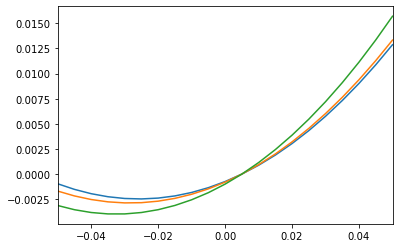

In [19]:
dr_list, e_r_list, e_u0_list, e_u1_list = get_r_ene(1.4)
fig, ax = pyplot.subplots()
ax.plot(dr_list, e_r_list - e_r_list[11])
ax.plot(dr_list, e_u0_list - e_u0_list[11])
ax.plot(dr_list, e_u1_list - e_u1_list[11])
ax.set_xlim(-0.05, 0.05)

(-0.05, 0.05)

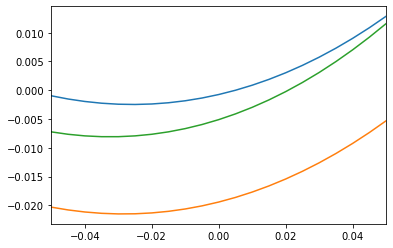

In [20]:
fig, ax = pyplot.subplots()
ax.plot(dr_list, e_r_list - e_r_list[11])
ax.plot(dr_list, e_u0_list - e_r_list[11])
ax.plot(dr_list, e_u1_list - e_r_list[11])
ax.set_xlim(-0.05, 0.05)

WARN: HOMO -0.759340774107171 == LUMO -0.75934077410717
WARN: alpha nocc = 14  HOMO -0.75114241703086 >= LUMO -0.751142417030859
WARN: beta  nocc = 14  HOMO -0.750588600984834 >= LUMO -0.750588600984834
WARN: system HOMO -0.750588600984834 >= system LUMO -0.750588600984834
WARN: alpha nocc = 15  HOMO 0.596405491261784 >= LUMO 0.596405491261785
WARN: system HOMO 0.596405491261784 >= system LUMO 0.373779993484776
WARN: beta  nocc = 13  HOMO 0.599324981792111 >= LUMO 0.599602319936664


dr = -0.05, erhf = -170.378844, eu0hf = -170.386217, eu1hf = -170.133971
dr = -0.05, erhf = -170.379750, eu0hf = -170.386431, eu1hf = -170.134386
dr = -0.04, erhf = -170.380573, eu0hf = -170.386567, eu1hf = -170.134701
dr = -0.04, erhf = -170.381314, eu0hf = -170.386623, eu1hf = -170.134917
dr = -0.03, erhf = -170.381970, eu0hf = -170.386600, eu1hf = -170.135031
dr = -0.03, erhf = -170.382543, eu0hf = -170.386497, eu1hf = -170.135045
dr = -0.02, erhf = -170.383032, eu0hf = -170.386315, eu1hf = -170.134957
dr = -0.01, erhf = -170.383436, eu0hf = -170.386052, eu1hf = -170.134769
dr = -0.01, erhf = -170.383755, eu0hf = -170.385708, eu1hf = -170.134478
dr = -0.01, erhf = -170.383988, eu0hf = -170.385284, eu1hf = -170.134084
dr =  0.00, erhf = -170.384134, eu0hf = -170.384777, eu1hf = -170.133588
dr =  0.00, erhf = -170.384194, eu0hf = -170.384188, eu1hf = -170.132989
dr =  0.01, erhf = -170.384167, eu0hf = -170.383517, eu1hf = -170.132285
dr =  0.01, erhf = -170.384051, eu0hf = -170.382762

(-0.05, 0.05)

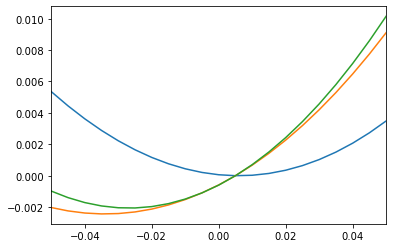

In [21]:
dr_list, e_r_list, e_u0_list, e_u1_list = get_r_ene(1.5)
fig, ax = pyplot.subplots()
ax.plot(dr_list, e_r_list - e_r_list[11])
ax.plot(dr_list, e_u0_list - e_u0_list[11])
ax.plot(dr_list, e_u1_list - e_u1_list[11])
ax.set_xlim(-0.05, 0.05)

(-0.05, 0.05)

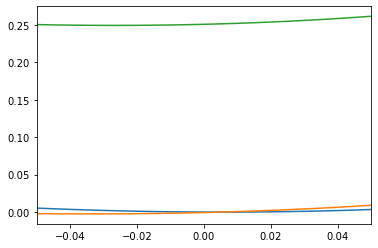

In [22]:
fig, ax = pyplot.subplots()
ax.plot(dr_list, e_r_list - e_r_list[11])
ax.plot(dr_list, e_u0_list - e_r_list[11])
ax.plot(dr_list, e_u1_list - e_r_list[11])
ax.set_xlim(-0.05, 0.05)